In [36]:
import subprocess
import matplotlib.pyplot as plt
import os

type = 'Edges'
if type == "Adj":
    Heading = "Adjacency List"
else:
    Heading = "Edge List"

# Sequential settings
seq = 'Sequential-Boruvka-' + type
seq_cpp = seq + '.cpp'
seq_executable = seq + '.o'
seq_results = seq + '.results'

# Parallel settings
parallel = 'Parallel-Boruvka-' + type
parallel_cpp = parallel + '.cpp'
parallel_executable = parallel + '.o'
parallel_results = parallel + '.results'


In [37]:
# Compile the C++ files (both sequential and parallel)
compile_commands = [
    f"g++ -std=c++17 -o {seq_executable} {seq_cpp}",
    f"g++ -std=c++17 -o {parallel_executable} {parallel_cpp}"
]

# Compile sequential and parallel code
for command in compile_commands:
    try:
        subprocess.run(command, shell=True, check=True)
        print(f"Compilation successful for: {command}")
    except subprocess.CalledProcessError as e:
        print(f"Compilation failed with error: {e}")
        exit(1)
        

Compilation successful for: g++ -std=c++17 -o Sequential-Boruvka-Edges.o Sequential-Boruvka-Edges.cpp
Compilation successful for: g++ -std=c++17 -o Parallel-Boruvka-Edges.o Parallel-Boruvka-Edges.cpp


In [38]:
# Define input values and thread counts
input_values = [1000, 2000, 3000, 4000, 5000]
threads = [8]

# Create or clear the results files
with open(seq_results, 'w') as file:
    file.write("")
with open(parallel_results, 'w') as file:
    file.write("")

# Function to run the test for a given executable and thread count
def run_test(executable, input_size, thread, results_file, run_count=5):
    total_ms = 0
    for run in range(1, run_count + 1):
        print(f"  Run {run}...")
        # Run the program and capture the output
        result = subprocess.run(
            ['./' + executable, str(input_size), str(thread)],
            capture_output=True, text=True
        )

        output = result.stdout
        # Extract the last two lines
        last_two_lines = "\n".join(output.splitlines()[-2:])

        # Write the run output to the results file
        with open(results_file, 'a') as file:
            file.write(f"Run {run}:\n")
            file.write(f"{last_two_lines}\n")

        # Extract milliseconds value
        ms_line = [line for line in last_two_lines.splitlines() if 'milliseconds' in line][0]
        ms = float(ms_line.split()[5])

        # Accumulate the sum of milliseconds
        total_ms += ms

    # Calculate the average time in milliseconds
    avg_ms = total_ms / run_count
    # Write averages to results file
    with open(results_file, 'a') as file:
        file.write(f"Average Time to build MST: {avg_ms:.5f} milliseconds\n")
        file.write("-----------------------------------\n")
    
    return avg_ms


In [39]:
# Run sequential for all input sizes
seq_avg_times = []
for input_size in input_values:
    print(f"Running sequential for input {input_size}...")
    
    # Write the input line for sequential results
    with open(seq_results, 'a') as file:
        file.write(f"Input: {input_size}\n")

    avg_time = run_test(seq_executable, input_size, 1, seq_results)  # Sequential runs with 1 thread
    seq_avg_times.append(avg_time)
    

Running sequential for input 1000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running sequential for input 2000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running sequential for input 3000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running sequential for input 4000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running sequential for input 5000...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...


In [40]:
# Run parallel for all input sizes with the specified thread count
parallel_avg_times = []
for input_size in input_values:
    print(f"Running parallel for input {input_size} with {threads[0]} threads...")
    
    # Write the input/thread line for parallel results
    with open(parallel_results, 'a') as file:
        file.write(f"Input: {input_size}, Threads: {threads[0]}\n")

    avg_time = run_test(parallel_executable, input_size, threads[0], parallel_results)  # Parallel runs with specified thread count
    parallel_avg_times.append(avg_time)


Running parallel for input 1000 with 8 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running parallel for input 2000 with 8 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running parallel for input 3000 with 8 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running parallel for input 4000 with 8 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...
Running parallel for input 5000 with 8 threads...
  Run 1...
  Run 2...
  Run 3...
  Run 4...
  Run 5...


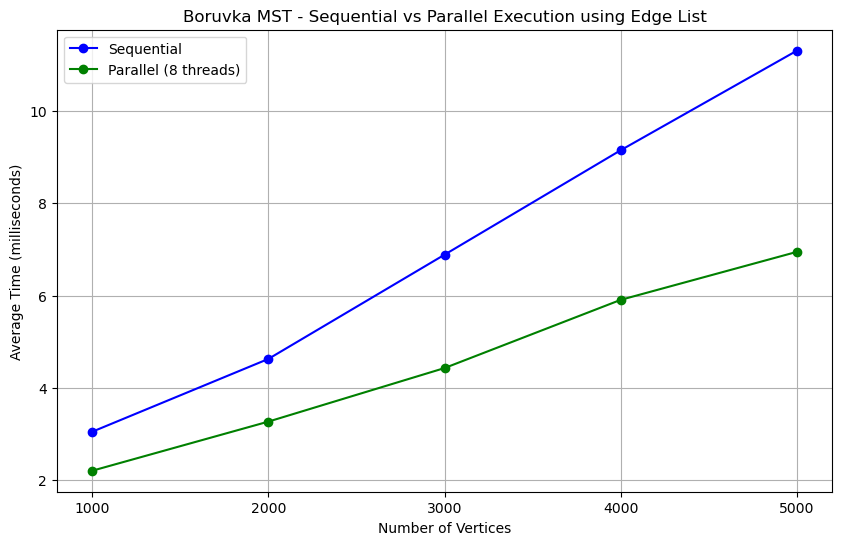

In [41]:
# Plot the graph comparing sequential vs parallel execution times
plt.figure(figsize=(10, 6))

# Plot sequential times
plt.plot(input_values, seq_avg_times, marker='o', color='blue', label='Sequential')

# Plot parallel times
plt.plot(input_values, parallel_avg_times, marker='o', color='green', label=f'Parallel ({threads[0]} threads)')

plt.xlabel('Number of Vertices')
plt.ylabel('Average Time (milliseconds)')
plt.title(f'Boruvka MST - Sequential vs Parallel Execution using {Heading}')
plt.legend()
plt.grid(True)
plt.xticks(input_values)

# Show the plot
plt.show()


In [42]:
# Clean up: Remove executables
os.remove(seq_executable)
os.remove(parallel_executable)
os.remove(seq_results)
os.remove(parallel_results)

print("Cleaned up executables and results files.")


Cleaned up executables and results files.
